In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df2 = df.rename(columns={'ID#': 'ID', 'Award?': 'Award'})

df2.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df2.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df3 = df2.drop(['ID','Award'], axis = 1)


# Correlation Plot

<IPython.core.display.Javascript object>

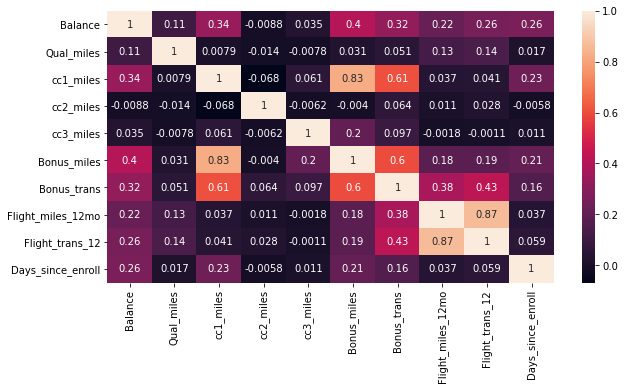

In [6]:
plt.figure(figsize = (10,5))
sns.heatmap(df3.corr(), annot=True)

<IPython.core.display.Javascript object>

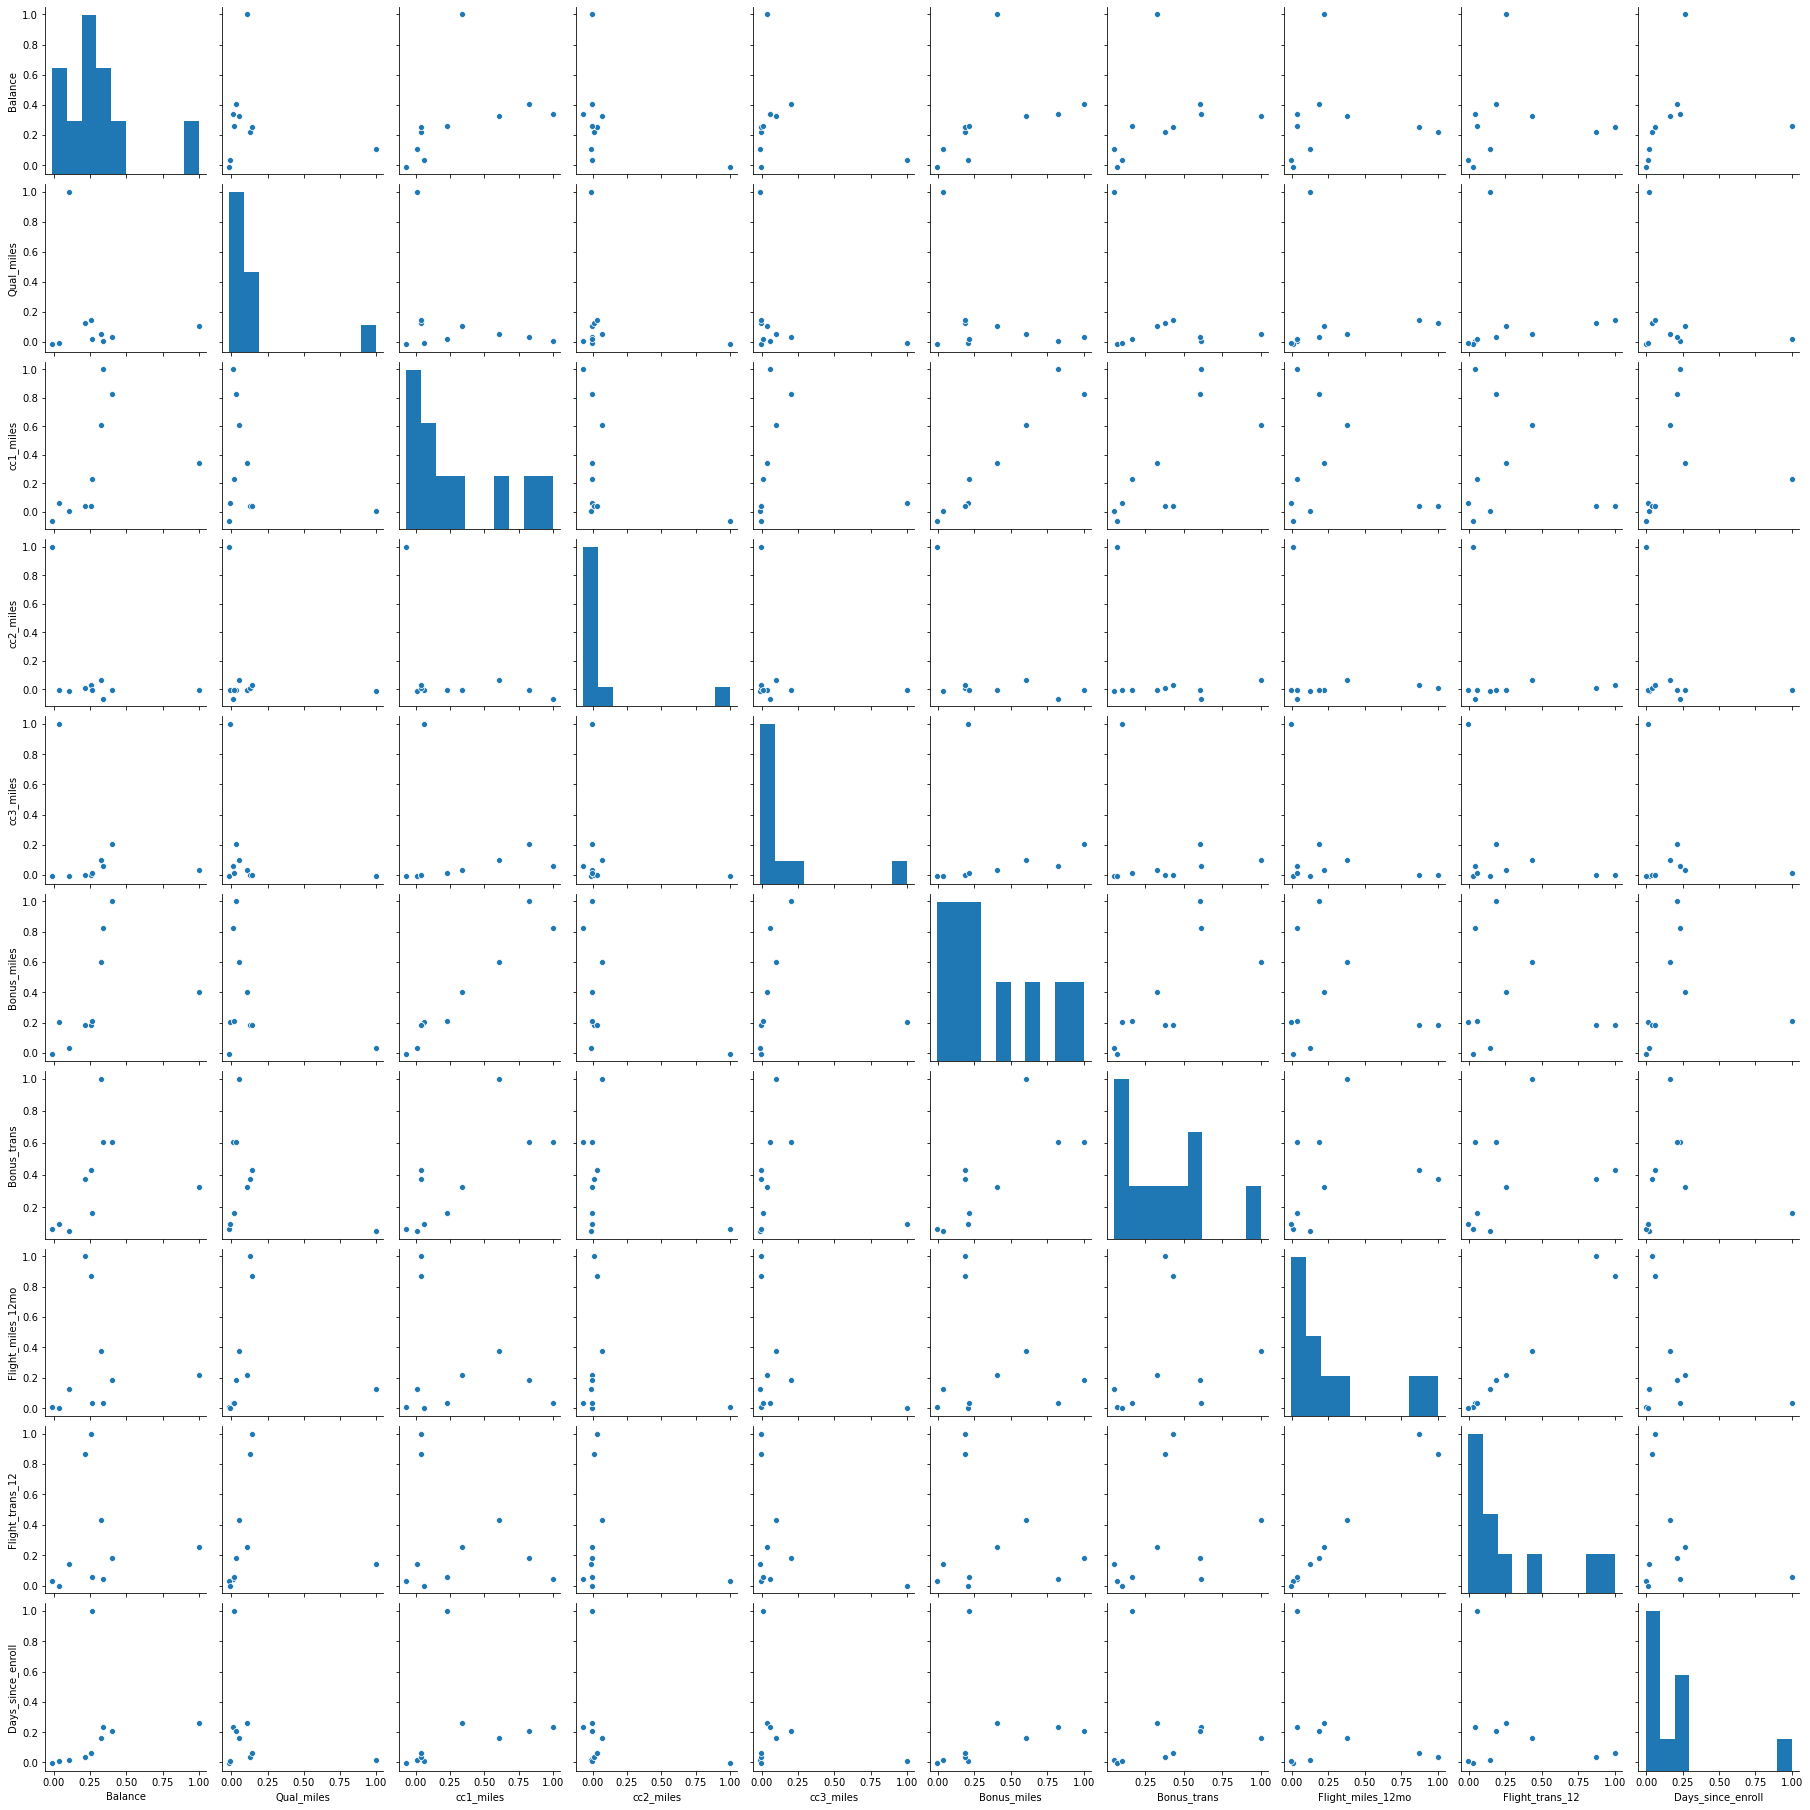

In [7]:
sns.pairplot(df3.corr())

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1F01D3BE0>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

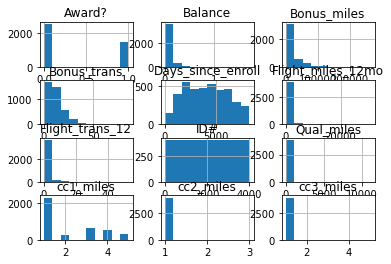

In [8]:
plt.figure(figsize = (20, 20))
df.hist()

<IPython.core.display.Javascript object>

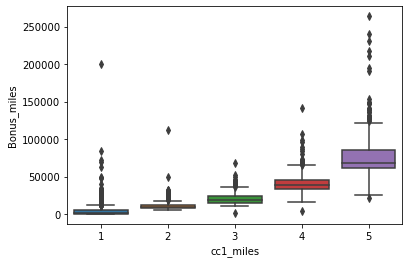

In [9]:
sns.boxplot(x= 'cc1_miles', y='Bonus_miles', data=df3)

<IPython.core.display.Javascript object>

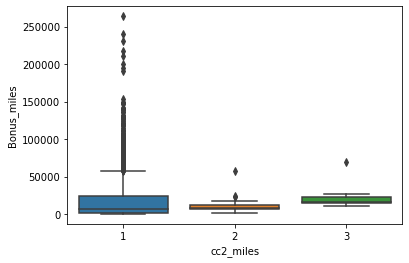

In [10]:
sns.boxplot(x= 'cc2_miles', y='Bonus_miles', data=df3)

<IPython.core.display.Javascript object>

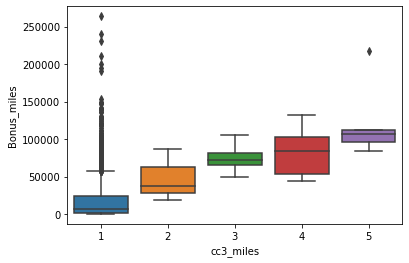

In [11]:
sns.boxplot(x= 'cc3_miles', y='Bonus_miles', data=df3)

<IPython.core.display.Javascript object>

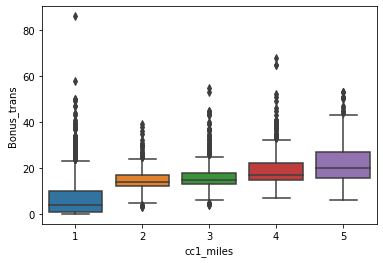

In [12]:
sns.boxplot(x= 'cc1_miles', y='Bonus_trans', data=df3)

<IPython.core.display.Javascript object>

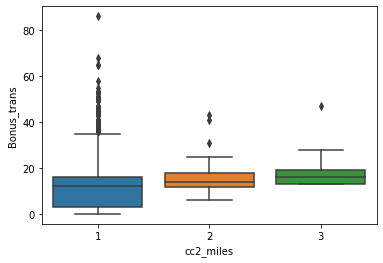

In [13]:
sns.boxplot(x= 'cc2_miles', y='Bonus_trans', data=df3)

<IPython.core.display.Javascript object>

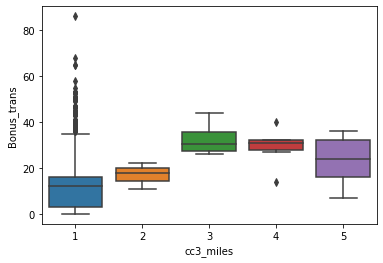

In [14]:
sns.boxplot(x= 'cc3_miles', y='Bonus_trans', data=df3)

# Scatter plot

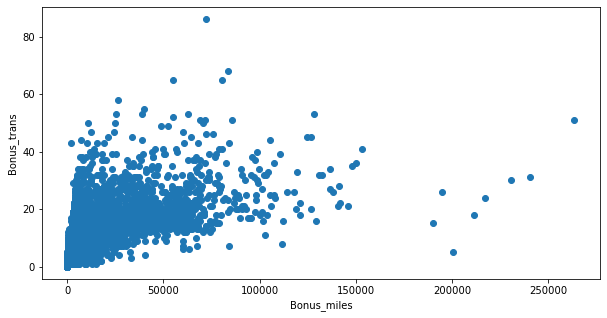

In [15]:
plt.figure(figsize=(10,5))
plt.scatter('Bonus_miles', 'Bonus_trans', data=df3)
plt.xlabel("Bonus_miles")
plt.ylabel("Bonus_trans")
plt.show()

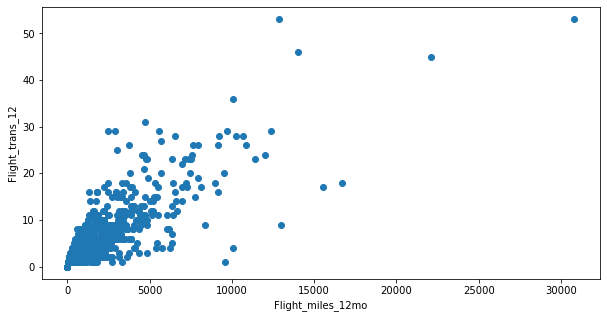

In [16]:
plt.figure(figsize=(10,5))
plt.scatter('Flight_miles_12mo', 'Flight_trans_12', data=df3)
plt.xlabel("Flight_miles_12mo")
plt.ylabel("Flight_trans_12")
plt.show()

# Count plot

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

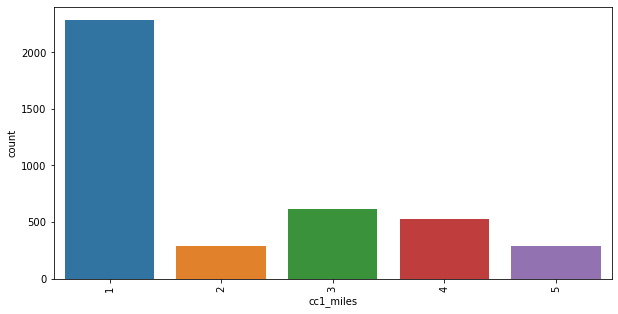

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df3['cc1_miles'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

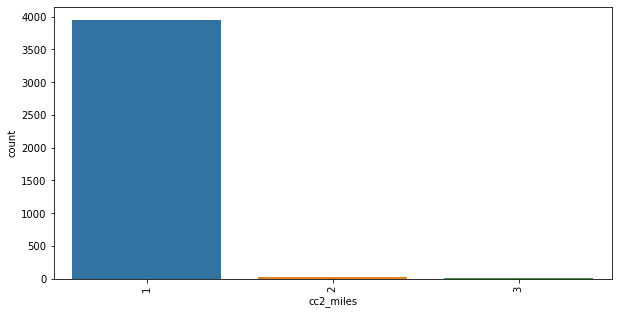

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df3['cc2_miles'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

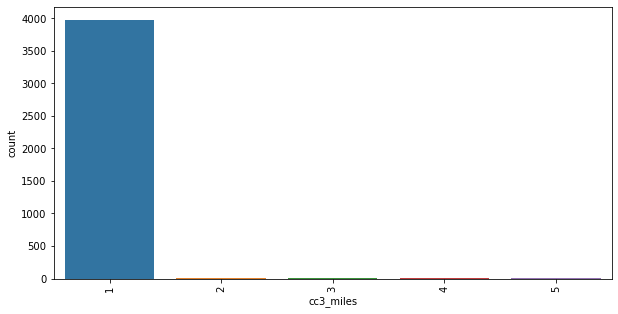

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df3['cc3_miles'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 <a list of 57 Text major ticklabel objects>)

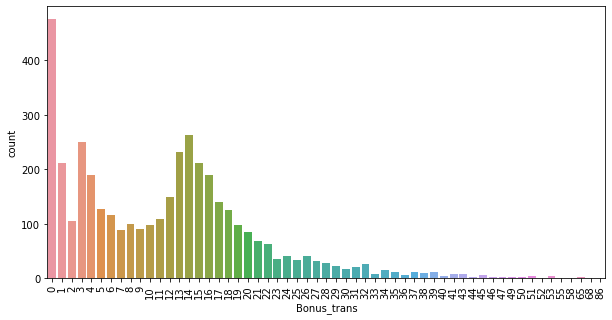

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df3['Bonus_trans'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

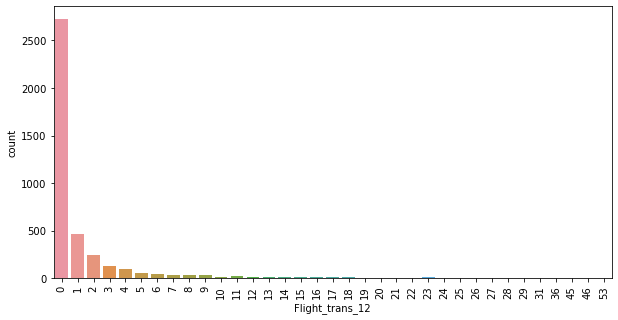

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df3['Flight_trans_12'])
plt.xticks(rotation=90)

# Splitting data

In [22]:
array=df3.values
array 

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

# Scaling Data

In [23]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [67]:
dbscan = DBSCAN(eps=0.65 , min_samples=7) # min_samples = D+1, where D is # features. 
dbscan.fit(X)             

DBSCAN(eps=0.65, min_samples=7)

In [68]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [69]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [70]:
cl
pd.set_option("display.max_rows", None) 

In [71]:
cl   

,cluster
0,0
1,0
2,0
3,0
4,-1
5,0
6,4
7,0
8,-1
9,-1


In [72]:
df4 = pd.concat([df,cl],axis=1) 
df4.head()    

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [73]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic') 

Text(0.5, 1.0, 'Clusters using DBScan')

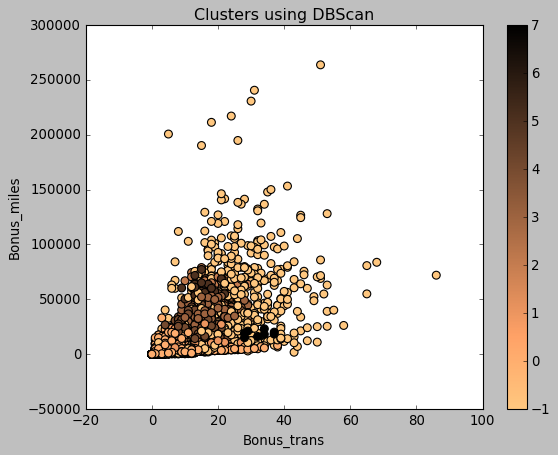

In [74]:
df4.plot(x="Bonus_trans",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')   

Text(0.5, 1.0, 'Clusters using DBScan')

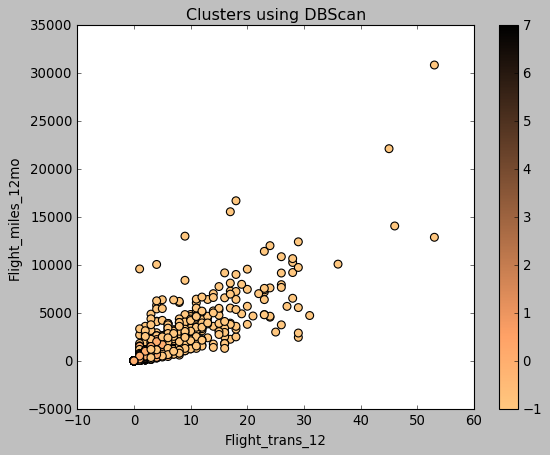

In [75]:
df3.plot(x="Flight_trans_12",y ="Flight_miles_12mo",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')   

As we can see both the clusters are overlapping.

In [165]:
dl = dbscan.labels_   #number of clusters formed

dl

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
sklearn.metrics.silhouette_score(X, dl) 

<IPython.core.display.Javascript object>

0.07081705577072712

##### The silhouette score for this model is very poor. The clusters formed are overlapping.

# Model 2: Changing eps values.

In [293]:
dbscan=DBSCAN(eps=0.75,min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.75, min_samples=7)

In [294]:
label = dbscan.labels_ #putting labels in dbscan

from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool) 

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


In [295]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,-1
5,0
6,0
7,0
8,-1
9,-1


In [296]:
data=pd.concat([c1,df],axis=1)

In [297]:
data.cluster.value_counts()

 0    3079
-1     776
 1     124
 2      11
 3       9
Name: cluster, dtype: int64

In [298]:
data2=data.groupby(data.cluster).mean()

data2

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,,
-1,-1.0,1743.594072,162385.462629,737.051546,2.670103,1.060567,1.063144,36608.359536,20.382732,1855.639175,5.371134,4646.738402,0.650773
0,0.0,2095.876583,50122.526794,1.416694,1.788243,1.000000,1.000000,10448.788568,9.097109,126.091913,0.417993,3960.850601,0.289055
1,1.0,1491.854839,107404.032258,0.000000,5.000000,1.000000,1.000000,62294.411290,17.282258,91.620968,0.298387,5049.233871,0.661290
2,2.0,2888.909091,26183.272727,0.000000,1.000000,2.000000,1.000000,8399.909091,11.636364,0.000000,0.000000,2762.909091,0.181818
3,3.0,3806.888889,43023.777778,0.000000,3.000000,1.000000,1.000000,18380.777778,33.111111,21.000000,0.111111,1366.000000,0.222222


In [299]:
sklearn.metrics.silhouette_score(X, label) #performance of model

<IPython.core.display.Javascript object>

0.14832961271570239

**<li>The number of clusters formed has decreased. Four clusters.**
**<li>This time we can see that the silhouette score has also improved.**
**<li>To get a better silhouette score we will need to put in optimum value of eps and min_samples.** 
